# Data loading and basic overview of data

In [1]:
#Data loading
import pandas as pd
import numpy as np
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#data prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
#data evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV 

In [2]:
colours= ['lightskyblue', 'red', 'blue', 'green', 'gold']

In [3]:
train = pd.read_csv('hrtrain.csv')
test = pd.read_csv('hrtest.csv')
print(f'{train.shape[0]} rows in train data,{train.shape[1]}cols in train data')
print(f'{test.shape[0]} rows in test data,{test.shape[1]}cols in test data.')

54808 rows in train data,14cols in train data
23490 rows in test data,13cols in test data.


In [4]:
train.head().style.background_gradient(cmap='Blues')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000000,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000000,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000000,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000000,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000000,2,0,0,73,0


In [5]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
train.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000000,39195.830627,22586.581449,1.000000,19669.750000,39225.500000,58730.500000,78298.000000
no_of_trainings,54808.000000,1.253011,0.609264,1.000000,1.000000,1.000000,1.000000,10.000000
age,54808.000000,34.803915,7.660169,20.000000,29.000000,33.000000,39.000000,60.000000
previous_year_rating,50684.000000,3.329256,1.259993,1.000000,3.000000,3.000000,4.000000,5.000000
length_of_service,54808.000000,5.865512,4.265094,1.000000,3.000000,5.000000,7.000000,37.000000
KPIs_met >80%,54808.000000,0.351974,0.477590,0.000000,0.000000,0.000000,1.000000,1.000000
awards_won?,54808.000000,0.023172,0.150450,0.000000,0.000000,0.000000,0.000000,1.000000
avg_training_score,54808.000000,63.386750,13.371559,39.000000,51.000000,60.000000,76.000000,99.000000
is_promoted,54808.000000,0.085170,0.279137,0.000000,0.000000,0.000000,0.000000,1.000000



<div style="background-color:#FCF6F5FF"> 
    <strong>
    1.Length of service  is numerical column and minimum value is 1 which does not make sense<br>
    2.mean of awards own is 0.02  which is low 
    </strong>
</div>

In [7]:
test.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
employee_id,23490.000000,39041.399149,22640.809201,3.000000,19370.250000,38963.500000,58690.000000,78295.000000
no_of_trainings,23490.000000,1.254236,0.600910,1.000000,1.000000,1.000000,1.000000,9.000000
age,23490.000000,34.782929,7.679492,20.000000,29.000000,33.000000,39.000000,60.000000
previous_year_rating,21678.000000,3.339146,1.263294,1.000000,3.000000,3.000000,4.000000,5.000000
length_of_service,23490.000000,5.810387,4.207917,1.000000,3.000000,5.000000,7.000000,34.000000
KPIs_met >80%,23490.000000,0.358834,0.479668,0.000000,0.000000,0.000000,1.000000,1.000000
awards_won?,23490.000000,0.022776,0.149191,0.000000,0.000000,0.000000,0.000000,1.000000
avg_training_score,23490.000000,63.263133,13.411750,39.000000,51.000000,60.000000,76.000000,99.000000


In [8]:
train.nunique().to_frame().T.style.background_gradient(cmap='Blues_r')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,54808,9,34,3,2,3,10,41,5,35,2,2,61,2


In [9]:
test.nunique().to_frame().T.style.background_gradient(cmap='Blues_r')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,23490,9,34,3,2,3,9,41,5,34,2,2,61


<div style="background-color:#FCF6F5FF"> 
    <strong>
       1.train and test set have same unique values no additonal values is given 
    </strong>
</div>

# checking for inconsitency in data

In [10]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<div style="background-color:#FCF6F5FF"> 
    <strong>
       in train data there are null values in education and previous year rating  
    </strong>
</div>

In [11]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<div style="background-color:#FCF6F5FF"> 
    <strong>
       in test data there are null values in education and previous year rating  
    </strong>
</div>

# Data preprocessing

In [12]:
train['education'].fillna(value=train['education'].mode()[0],inplace=True )
test['education'].fillna(value=test['education'].mode()[0],inplace=True )
train['previous_year_rating'].fillna(value=train['previous_year_rating'].mode()[0],inplace=True )
test['previous_year_rating'].fillna(value=test['previous_year_rating'].mode()[0],inplace=True )

In [13]:
categorical=list(train.select_dtypes('object').columns)
print(f' cateorical are {categorical}')
numerical=[each_c for each_c in train.columns if each_c not in categorical]
print(f' numerical are {numerical} .')

 cateorical are ['department', 'region', 'education', 'gender', 'recruitment_channel']
 numerical are ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'] .


# EDA analysis

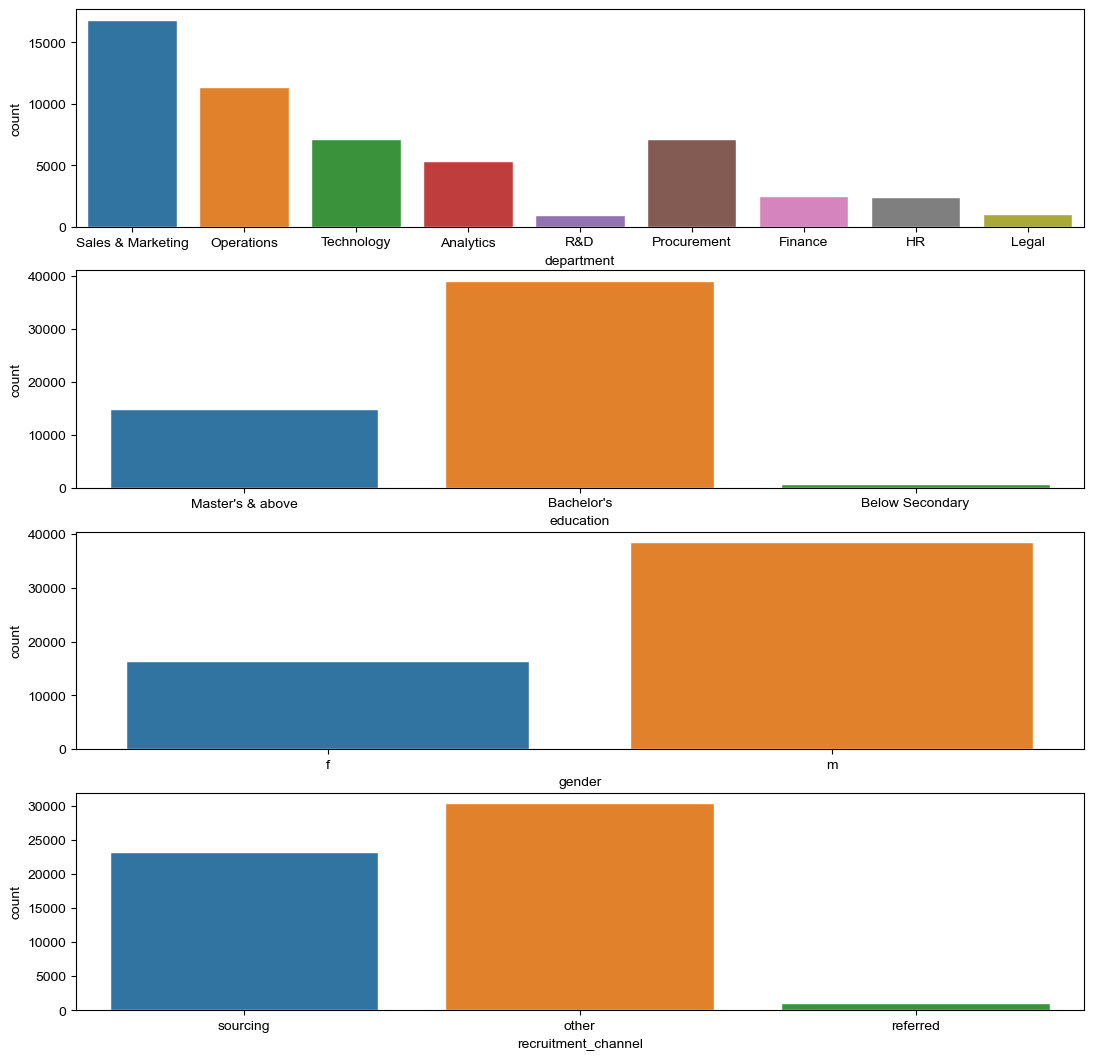

In [14]:
fig,ax=plt.subplots(4,1,figsize=(13,13))
k=0

temp_cat=[col for col in categorical if col!='region']
for i in range(len(ax)):
    sns.set_style("darkgrid")
    sns.countplot(data=train,x=temp_cat[k],ax=ax[i])
    k+=1

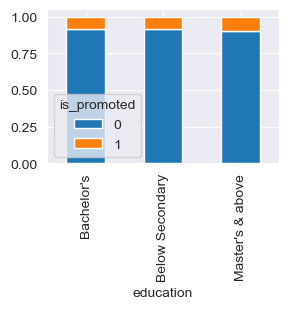

In [15]:
data = pd.crosstab(train['education'], train['is_promoted'])
ax=data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(3,2))

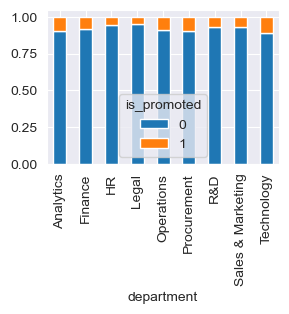

In [16]:
data = pd.crosstab(train['department'], train['is_promoted'])
ax=data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(3,2))

<div style="background-color:#FCF6F5FF"> 
    <strong>
       all department have almost equal probality in getting promotion
    </strong>
</div>

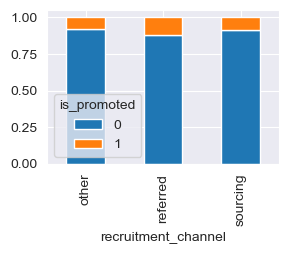

In [158]:
data = pd.crosstab(train['recruitment_channel'], train['is_promoted'])
ax=data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(3,2))
#equal percentage

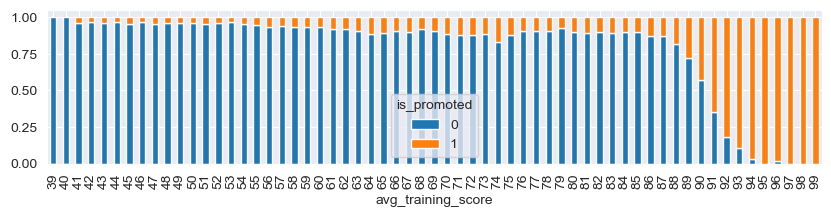

In [159]:
data =pd.crosstab(train['avg_training_score'],train['is_promoted'])
data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(10,2) )
plt.show()

<div style="background-color:#FCF6F5FF"> 
    <strong>
       avg training is directly proprtional to promotion
    </strong>
</div>

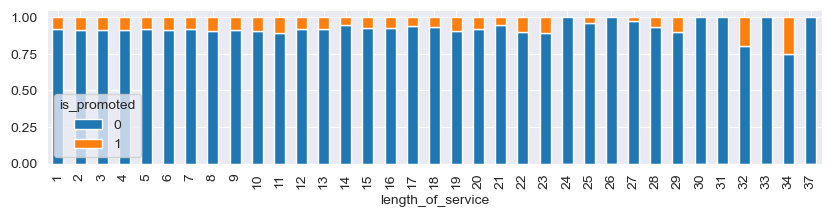

In [162]:
data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(10,2)) 
plt.show()

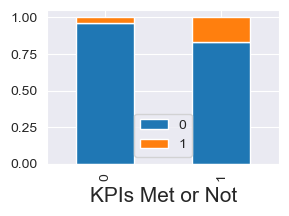

In [163]:
data =pd.crosstab(train['KPIs_met >80%'],train['is_promoted'])
data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(3,2),)
plt.xlabel('KPIs Met or Not', fontsize = 15)
plt.legend()
plt.show()

<div style="background-color:#FCF6F5FF"> 
    <strong>
       kpis==1 has high probability  to promote
    </strong>
</div>

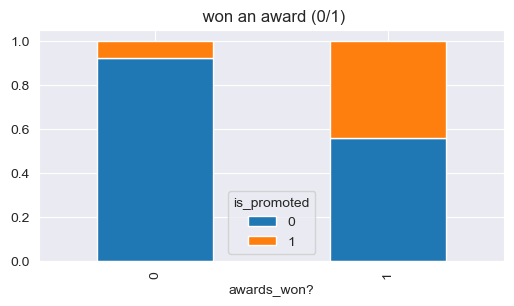

In [170]:
data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(6,3))
plt.title(' won an award (0/1)')
#sns also we can use  
plt.show()

<div style="background-color:#FCF6F5FF"> 
    <strong>
       person who won an award has high chance to get promotion 
    </strong>
</div>

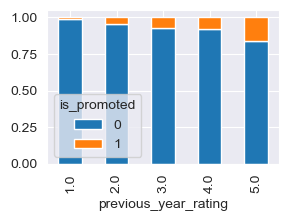

In [167]:
data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
ax=data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(3,2))

<div style="background-color:#FCF6F5FF"> 
    <strong>
       people with high rating has high probability to get promotion  
    </strong>
</div>

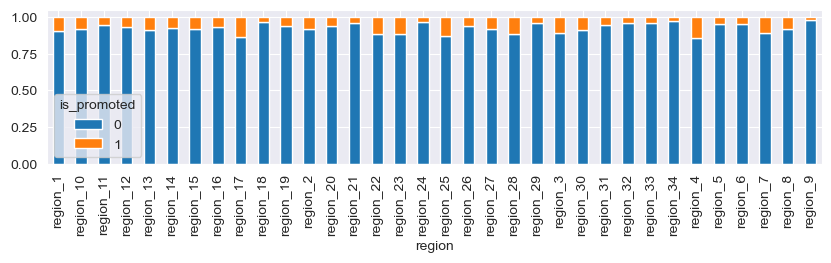

In [168]:
data = pd.crosstab(train['region'], train['is_promoted'])
ax=data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(10,2))

<div style="background-color:#FCF6F5FF"> 
    <strong>
       region has no effect in promotion
    </strong>
</div>

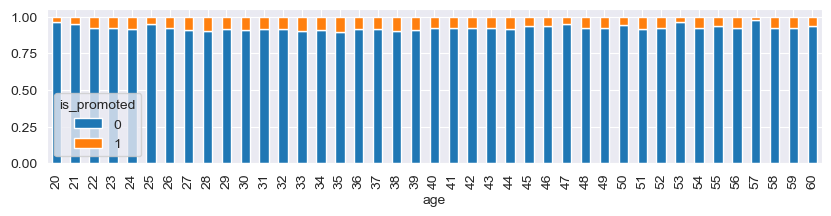

In [169]:
data = pd.crosstab(train['age'], train['is_promoted'])
ax=data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(10,2))

<div style="background-color:#FCF6F5FF"> 
    <strong>
       age has no effect in promotion 
    </strong>
</div>

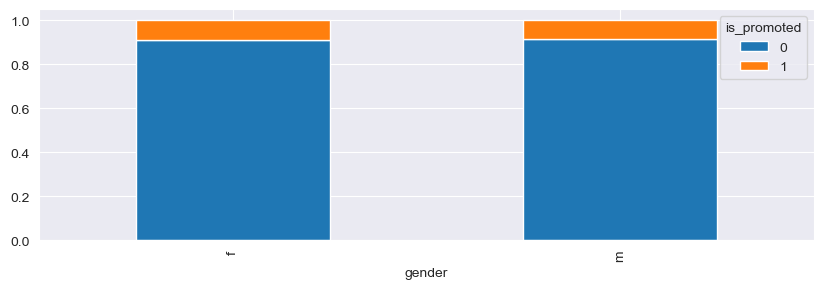

In [173]:
data = pd.crosstab(train['gender'], train['is_promoted'])
ax=data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(10,3))

<div style="background-color:#FCF6F5FF"> 
    <strong>
       men and women given equal priority
    </strong>
</div>

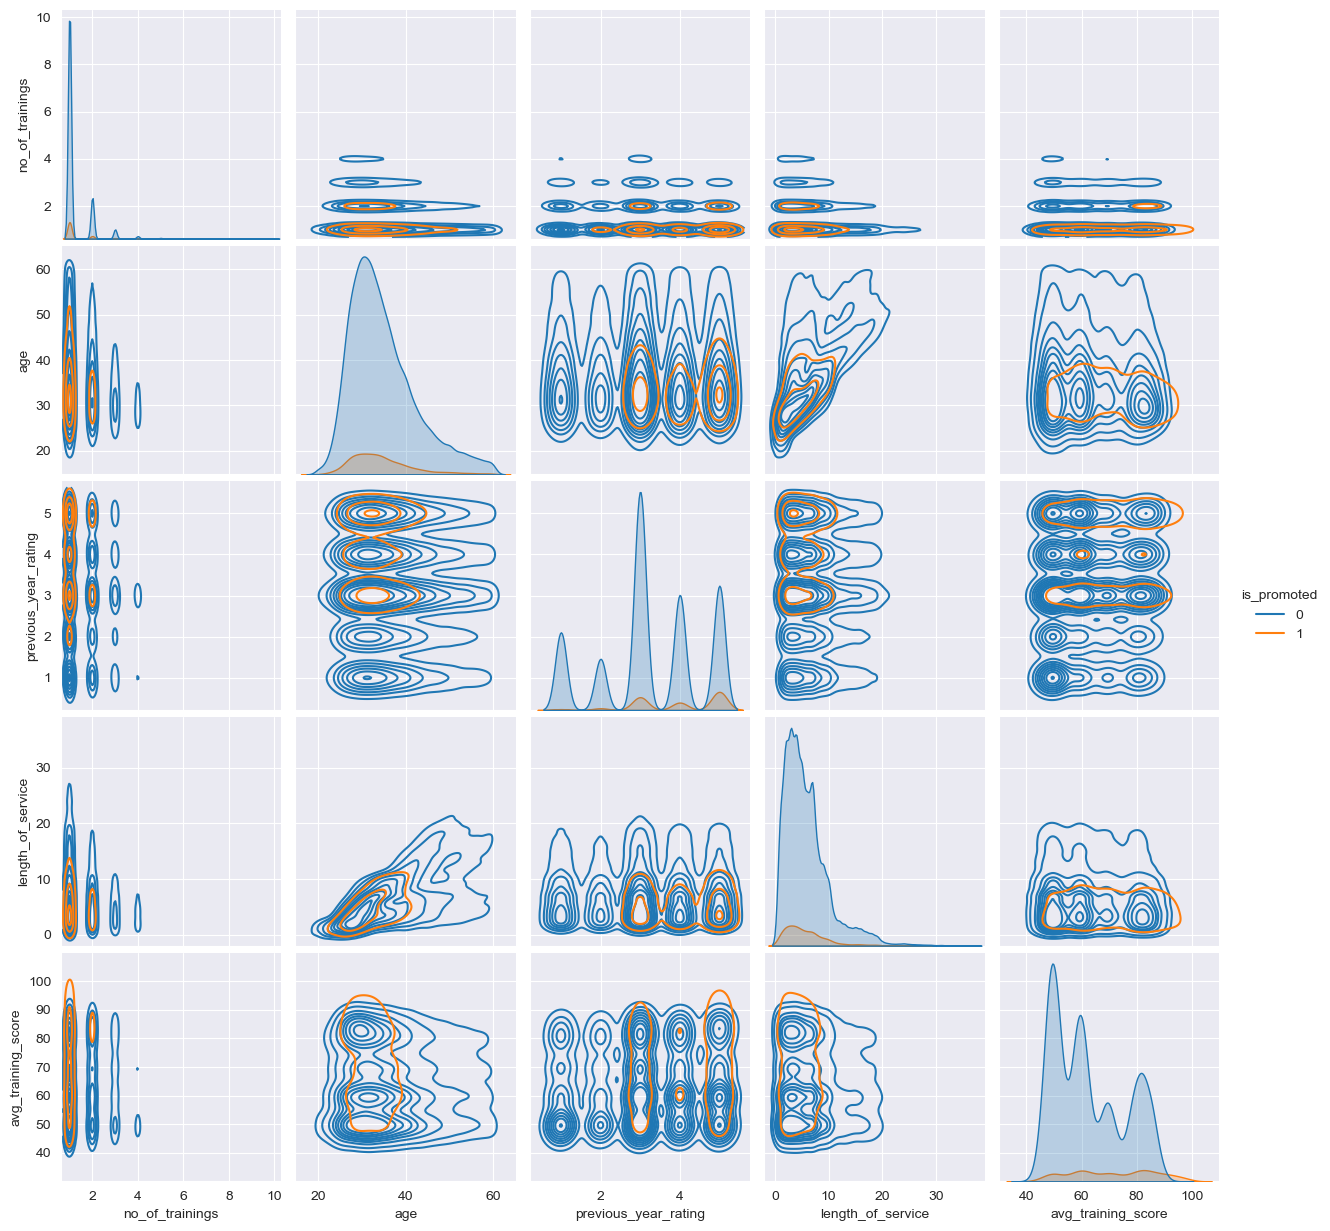

In [186]:
sns.pairplot(
    train,
    x_vars=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','avg_training_score'],
    y_vars=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','avg_training_score'],
    kind='kde',
    hue='is_promoted'
)
plt.show()

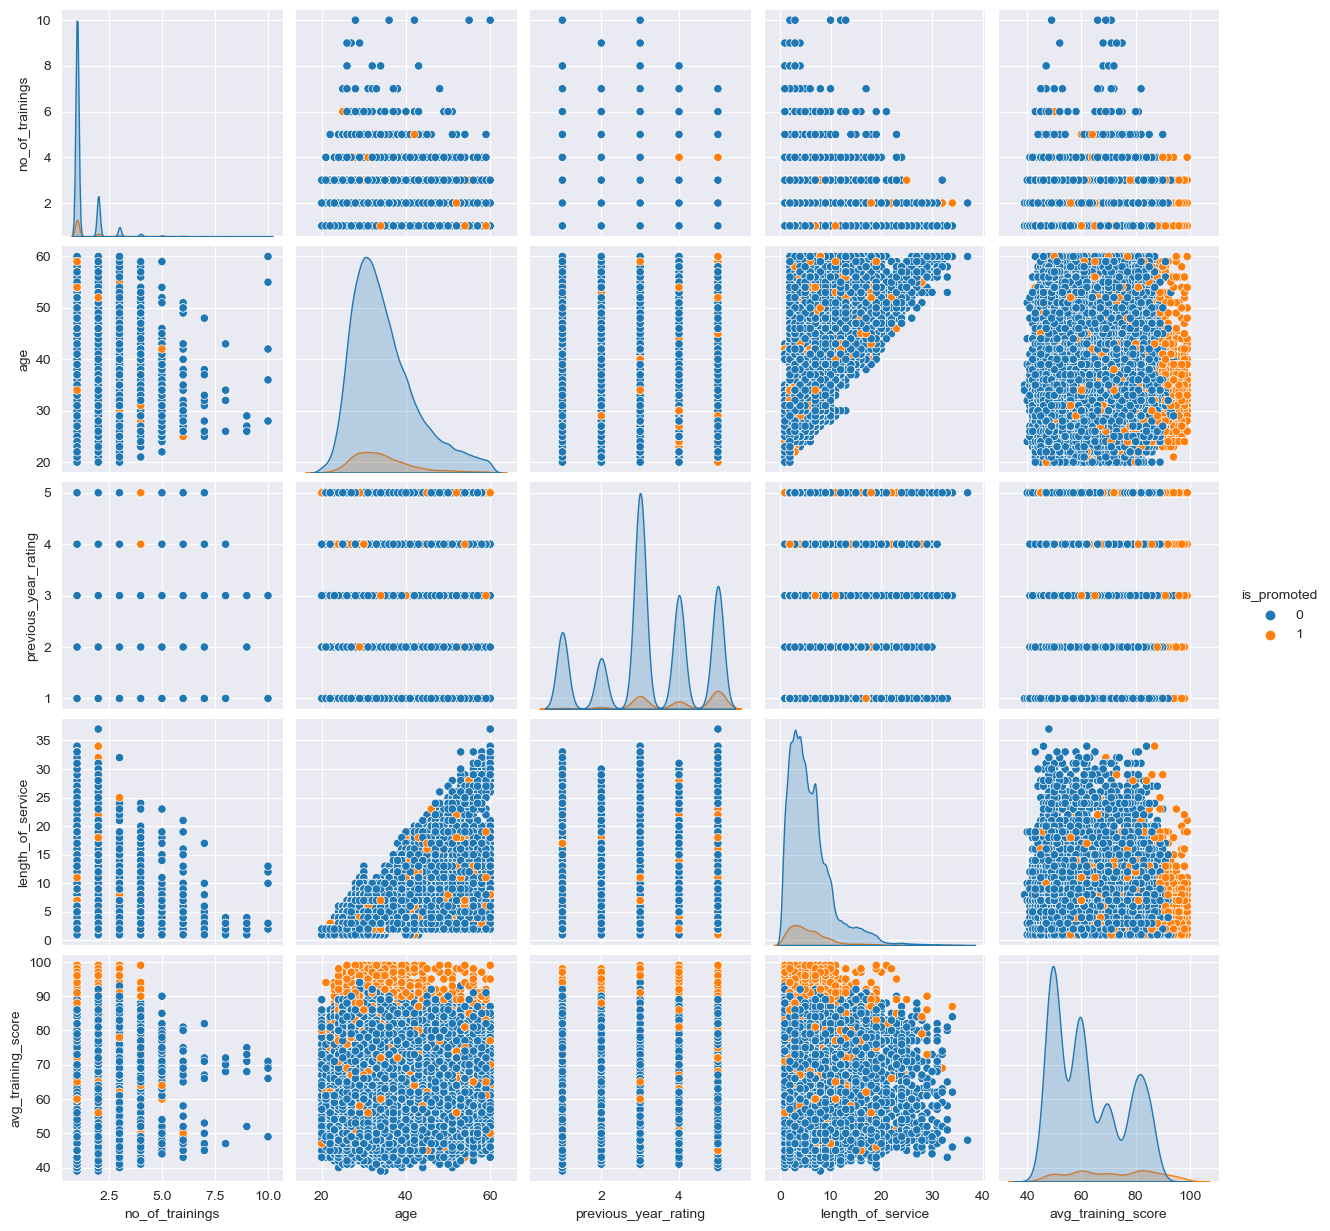

In [187]:
sns.pairplot(
    train,
    x_vars=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','avg_training_score'],
    y_vars=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','avg_training_score'],
    hue='is_promoted'
)
plt.show()

<AxesSubplot:ylabel='is_promoted'>

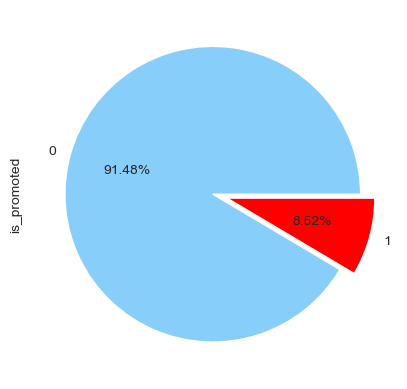

In [17]:
train['is_promoted'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0.1],colors=colours)

<div style="background-color:#FCF6F5FF"> 
    <strong>
       imbalanced data found  
    </strong>
</div>

In [18]:
d=train.loc[:,['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','avg_training_score']]
d.corr().style.background_gradient(cmap='Blues')

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.061564,-0.057275,0.042517
age,-0.081278,1.000000,0.026810,0.657111,-0.048380
previous_year_rating,-0.061564,0.026810,1.000000,0.023504,0.071926
length_of_service,-0.057275,0.657111,0.023504,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,0.071926,-0.038122,1.000000


<div style="background-color:#FCF6F5FF"> 
    <strong>
       age and length of service are some what corerlate to each other  
    </strong>
</div>

<AxesSubplot:xlabel='length_of_service'>

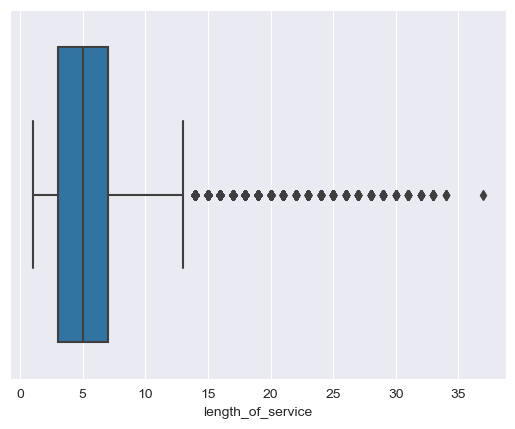

In [19]:
sns.boxplot(data=train,x='length_of_service')

# feature scaling

In [15]:
# eid=test['employee_id']

In [16]:
train = train.drop(['region', 'employee_id'], axis = 1)
test = test.drop(['region', 'employee_id'], axis = 1)

In [17]:
test.head().style.background_gradient(cmap='Blues')

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,sourcing,1,24,3.000000,1,1,0,77
1,HR,Bachelor's,f,other,1,31,3.000000,5,0,0,51
2,Sales & Marketing,Bachelor's,m,other,1,31,1.000000,4,0,0,47
3,Procurement,Bachelor's,f,other,3,31,2.000000,9,0,0,65
4,Finance,Bachelor's,m,sourcing,1,30,4.000000,7,0,0,61


In [18]:
train['recruitment_channel'] = train['recruitment_channel'].replace(("referred", "sourcing", "other"),
                                                (3, 2, 1))
test['recruitment_channel'] = test['recruitment_channel'].replace(("referred", "sourcing", "other"),
                                                (3, 2, 1))
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

In [19]:
train['sum_metric'] = train['awards_won?']+3*train['KPIs_met >80%'] + 2*train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+3*test['KPIs_met >80%'] + 2*test['previous_year_rating']

train['total_score'] = train['avg_training_score'] +train['no_of_trainings']
test['total_score'] = test['avg_training_score'] +test['no_of_trainings']

In [20]:
train.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'sum_metric', 'total_score'],
      dtype='object')

# label encoder


In [21]:
# from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender']=le.fit_transform(test['gender'])

print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [22]:
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,2,1,35,5.0,8,1,0,49,0,13.0,50
1,4,2,1,1,1,30,5.0,4,0,0,60,0,10.0,61
2,7,2,1,2,1,34,3.0,7,0,0,50,0,6.0,51
3,7,2,1,1,2,39,1.0,10,0,0,50,0,2.0,52
4,8,2,1,1,1,45,3.0,2,0,0,73,0,6.0,74


In [23]:
test.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,8,2,1,2,1,24,3.0,1,1,0,77,9.0,78
1,2,2,0,1,1,31,3.0,5,0,0,51,6.0,52
2,7,2,1,1,1,31,1.0,4,0,0,47,2.0,48
3,5,2,0,1,3,31,2.0,9,0,0,65,4.0,68
4,1,2,1,2,1,30,4.0,7,0,0,61,8.0,62


# spliiting train and test data

In [24]:
y = train['is_promoted']
train=train.drop(['is_promoted'], axis = 1)

In [25]:
x_train=train
x_test = test

print("Shape of the x :", x_train.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54808, 13)
Shape of the y : (54808,)
Shape of the x Test : (23490, 13)


## balance the data set 

In [26]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x_train, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(100280, 13)
(100280,)


In [27]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4668
Name: is_promoted, dtype: int64
After Resampling :
0    50140
1    50140
Name: 0, dtype: int64


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 13)
Shape of the y Train : (80224, 1)
Shape of the x Valid : (20056, 13)
Shape of the y Valid : (20056, 1)
Shape of the x Test : (23490, 13)


In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

# model choosing 

### descision tree classifier

In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_valid)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
def evaluate(model,x_train,y_train):
    print("Training Accuracy :", dtc.score(x_train, y_train))
    print("Testing Accuracy :", dtc.score(x_valid, y_valid))
    cm = confusion_matrix(y_valid, y_pred)
    plt.rcParams['figure.figsize'] = (3, 3)
    sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = '.8g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

Training Accuracy : 0.993293777423215
Testing Accuracy : 0.929397686477862


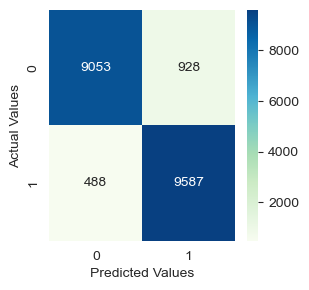

In [32]:
evaluate(dtc,x_train,y_train)

In [33]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_valid, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.91      0.93      9981
     class 1       0.91      0.95      0.93     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [34]:
def makeoutput(model,x_test):
    yout=dtc.predict(x_test)
    d={'employee_id':eid,'is_promoted':yout}
    df = pd.DataFrame(d)
    df.to_csv('analyticssubmisson.csv',index=False)

In [53]:
makeoutput(dtc,x_test)

####  XGB classifier

In [35]:
xgb_c = xgb.XGBClassifier()
xgb_c.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [36]:
print("Training Accuracy :", xgb_c.score(x_train, y_train))
print("Testing Accuracy :", xgb_c.score(x_valid, y_valid))

Training Accuracy : 0.9107623653769445
Testing Accuracy : 0.898284802552852


In [37]:
yout=xgb_c.predict(x_test)
d={'employee_id':eid,'is_promoted':yout}
df = pd.DataFrame(d)

df.to_csv('analyticssubmisson.csv',index=False)

In [38]:
lgb_c = lgb.LGBMClassifier(objective = "binary", n_jobs = -1, random_state = 42, n_estimators = 500)
lgb_c.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(n_estimators=500, objective='binary', random_state=42)

Training Accuracy : 0.993293777423215
Testing Accuracy : 0.929397686477862


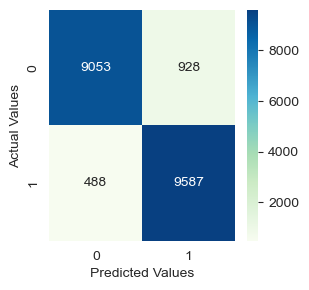

In [39]:
evaluate(lgb_c,x_train,y_train)

In [40]:
yout=lgb_c.predict(x_test)
d={'employee_id':eid,'is_promoted':yout}
df = pd.DataFrame(d)
df.to_csv('analyticssubmisson.csv',index=False)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

Training Accuracy : 0.9932813123254887
Testing Accuracy : 0.9262564818508177


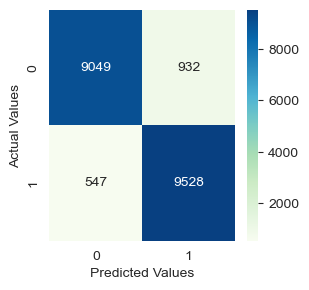

In [51]:
evaluate(rc,x_train,y_train)

In [42]:
print(classification_report(y_valid, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.91      0.93      9981
     class 1       0.91      0.95      0.93     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [44]:
model = GradientBoostingClassifier(random_state=0)
model.fit(x_train,y_train.values.ravel())

GradientBoostingClassifier(random_state=0)

Training Accuracy : 0.993293777423215
Testing Accuracy : 0.929397686477862


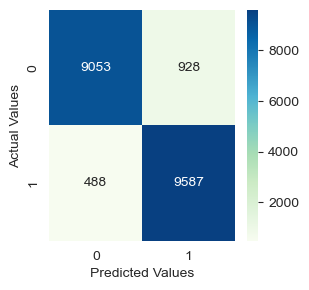

In [45]:
evaluate(model,x_train,y_train)

## conclusion:xgb and light bgm classifiers have high f1 score 

# orgainising in structured manner  using pipe lines(continued)...........